In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## CBC overview

100%|██████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.82it/s]


len                                                  mean  \
month            1     2     3     4     5     6    11    12           1   
period                                                                     
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    4.628282   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    4.613231   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    4.564537   
Control-2021  1700  3969  3083  2836  3827  2604  2224  1008  246.105588   
Control-2022  1696  3982  3086  2834  3835  2606  2223  1009  249.390035   
Test-2023     1696  3974  3085  2834  3833  2610  2219  1010  254.080778   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    5.938738   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    6.037647   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    6.072266   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008  137.998529   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009  137.715507   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010  135.383913   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008   41.654559   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009   41.597583   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010   41.330289   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008   90.210618   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009   90.385967   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010   90.755274   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008   29.878265   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009   29.919192   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010   29.731703   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008  330.986765   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009  330.805719   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010  327.379199   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008   12.631941   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009   12.630719   
Test-2023     1697  3974  3086  2836  3835  2611  2219  1010   12.939923   
Control-2021  1687  3930  3059  2821  3796  2578  2207  1003   10.818672   
Control-2022  1680  3951  3062  2819  3819  2593  2209  1006   10.791250   
Test-2023     1682  3946  3065  2822  3821  2596  2209  1007   10.520214   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    3.327826   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    3.269950   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    3.376576   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    2.047882   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    2.187886   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    2.123751   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    0.407759   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    0.416114   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    0.410961   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    0.034324   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    0.033838   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    0.031346   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008    0.121591   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009    0.129652   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010    0.129635   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008   55.159765   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009   53.492276   
Test-2023     1697  3975  3086  2836  3835  2611  2219  1010   54.986388   
Control-2021  1700  3969  3083  2838  3829  2606  2224  1008   35.220382   
Control-2022  1696  3982  3086  2834  3835  2607  2224  1009   

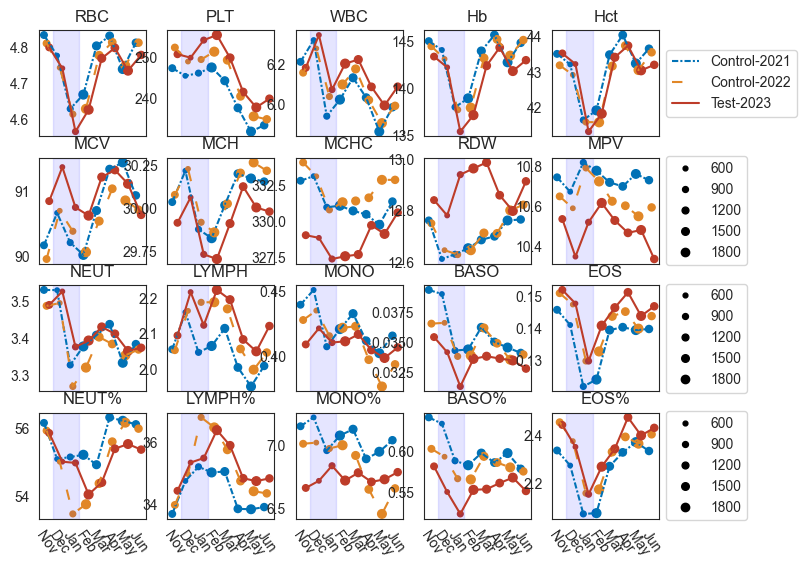

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"]=="CBC"]["item_id"])
l_tags = [
    'v9057','v9064','v9045','v9058','v9059',
    'v9060','v9061','v9062','v9063','v9065',
    'v9051','v9055','v9089','v9091','v9090',
    'v9046','v9047','v9048','v9049','v9050',
]
l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)

fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure5_A.pdf")
df_res

## RDW Scatter for different ages

RDW


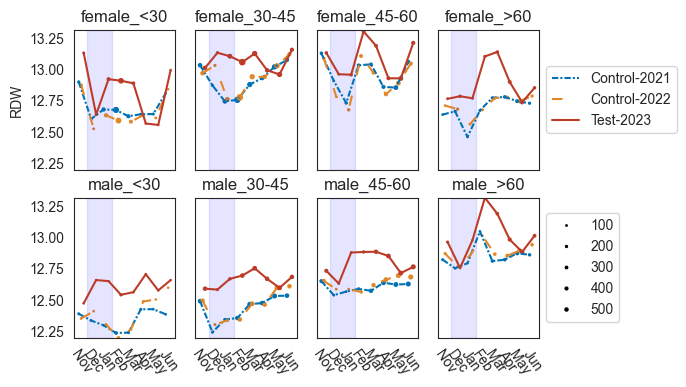

In [3]:
tag = l_tags[8]
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS5_A.pdf")

## boxplot_pvalue for RDW

,item_id,gender,age_group,month,period,n,fold_change,log10_p
0,v9063,female,<30,11,2021-2022,176,0.998162,0.058390
1,v9063,female,<30,11,2022-2023,139,1.019846,0.916420
2,v9063,female,30-45,11,2021-2022,525,0.995110,0.328162
3,v9063,female,30-45,11,2022-2023,534,1.003235,0.211745
4,v9063,female,45-60,11,2021-2022,220,0.996806,0.117131
...,...,...,...,...,...,...,...,...
59,v9063,male,30-45,6,2022-2023,489,1.005924,0.837257
60,v9063,male,45-60,6,2021-2022,683,1.004428,0.848062
61,v9063,male,45-60,6,2022-2023,689,1.006402,1.633720
62,v9063,male,>60,6,2021-2022,228,1.006278,0.436521


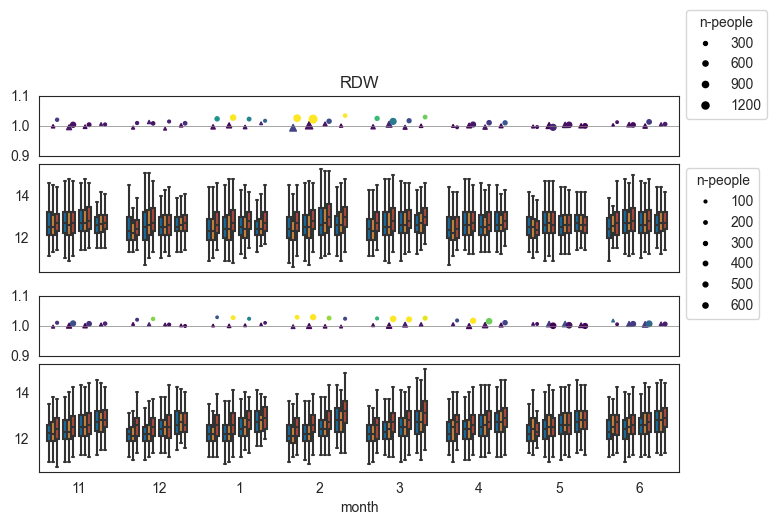

In [4]:
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)

fig, df_res = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
)
fig.savefig(f"{workdir}/Figure5_D.pdf")
df_res

## Other plots

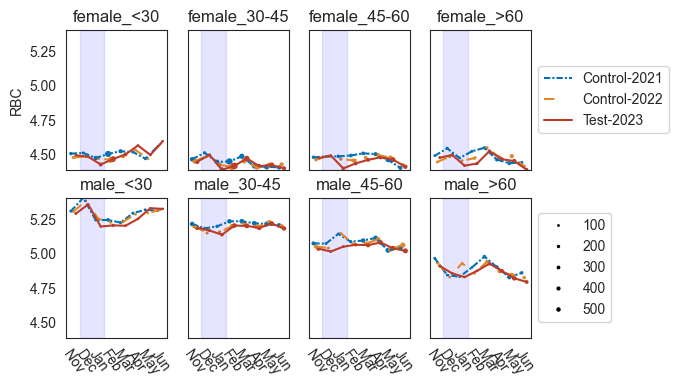

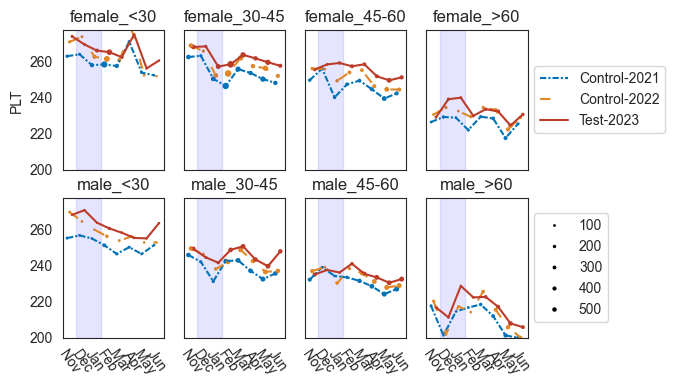

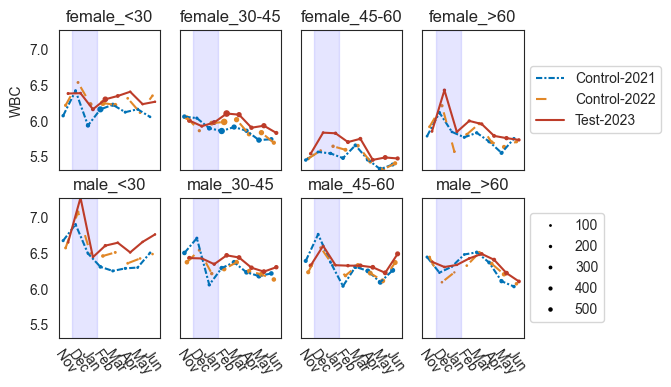

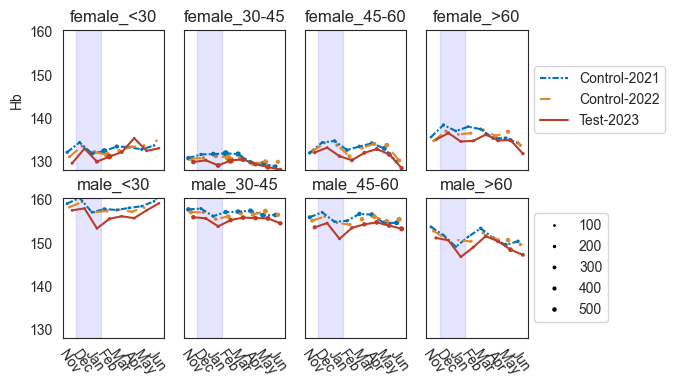

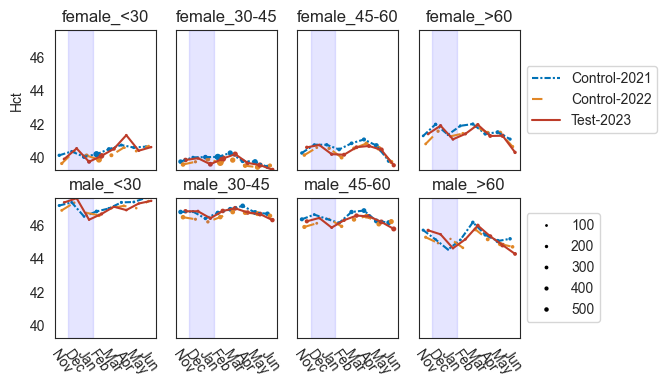

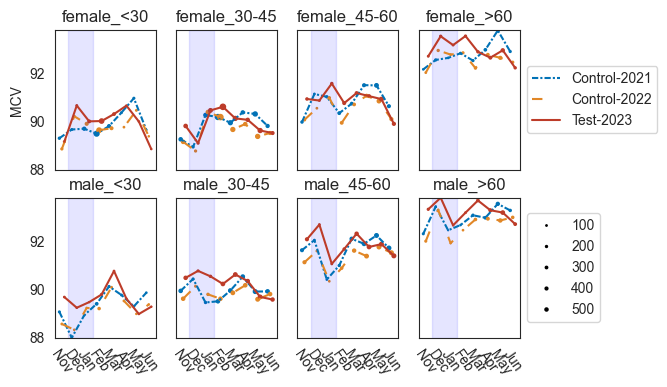

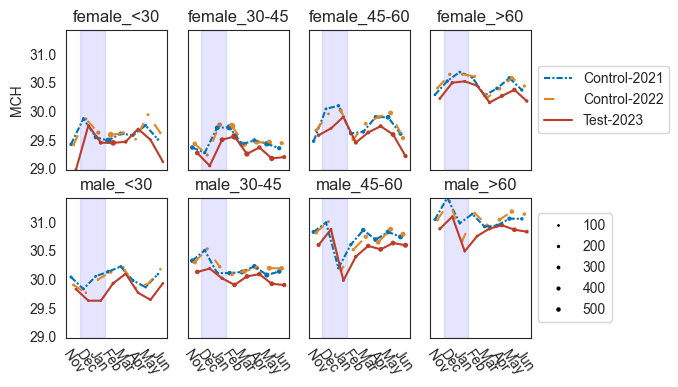

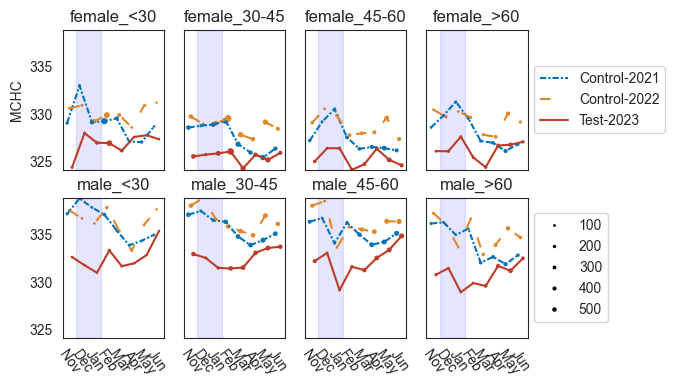

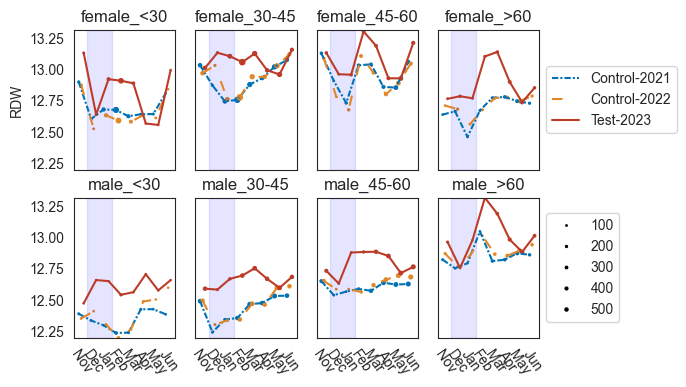

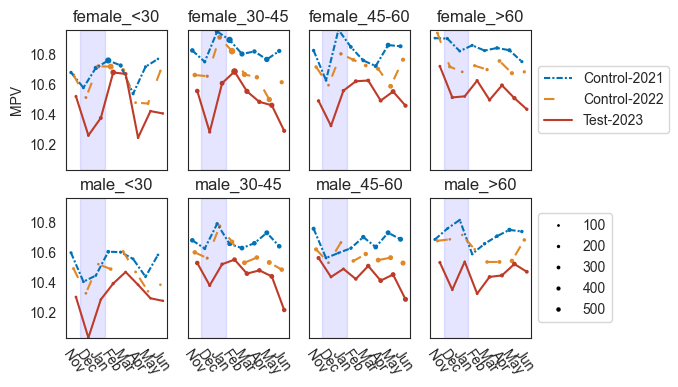

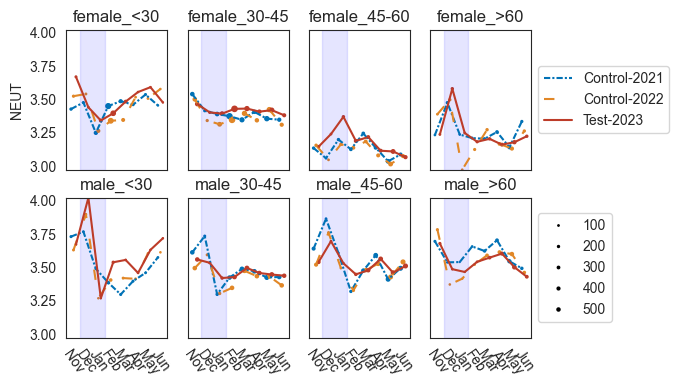

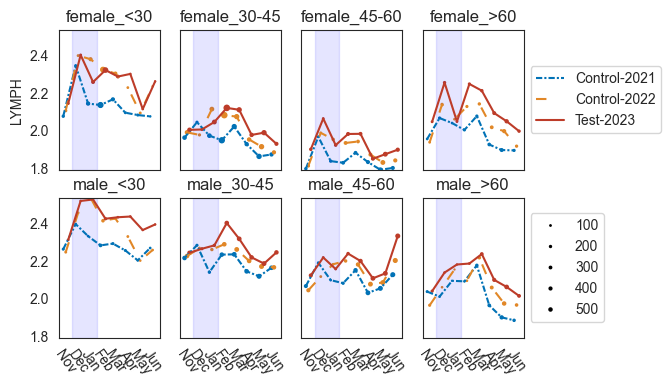

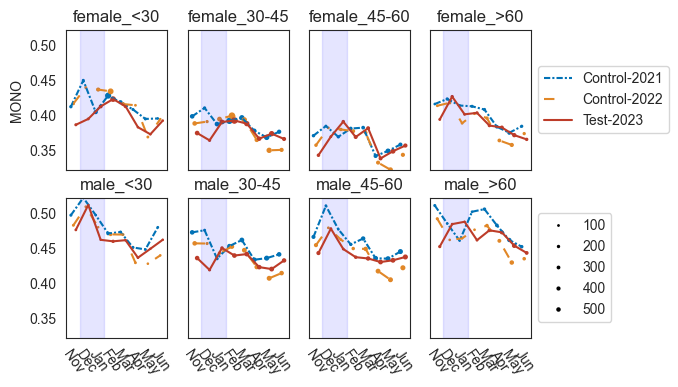

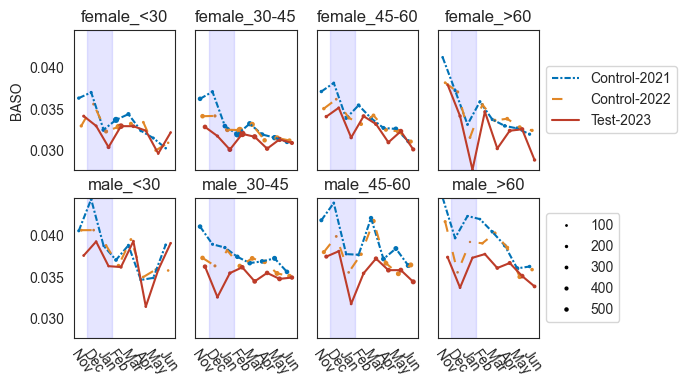

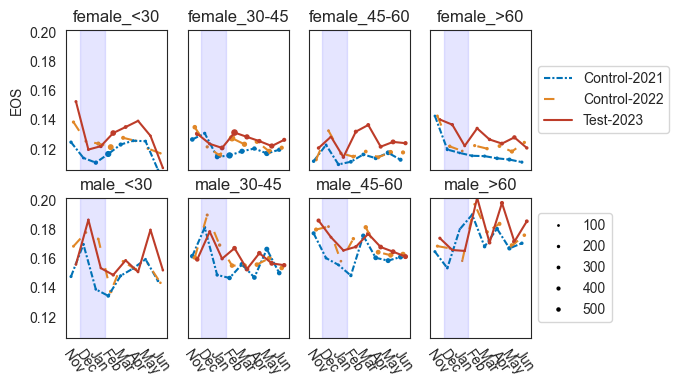

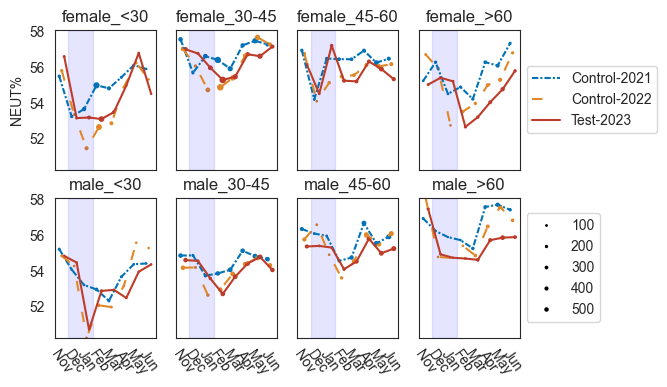

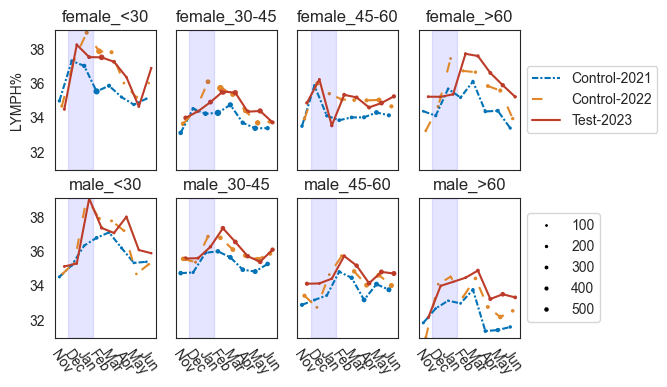

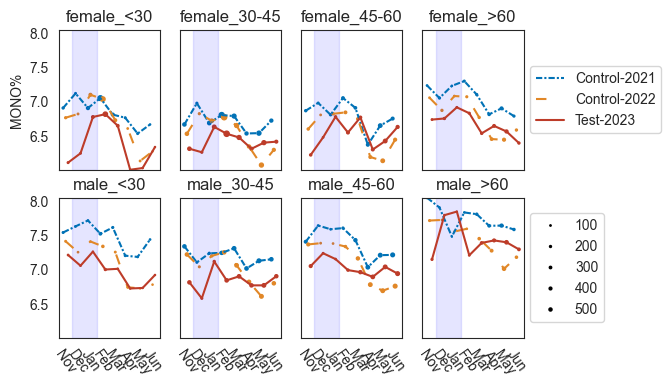

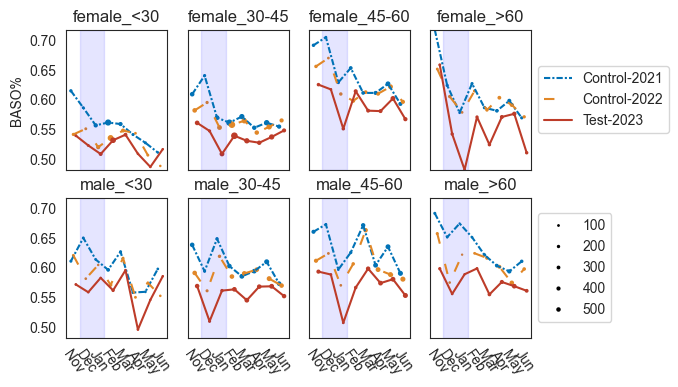

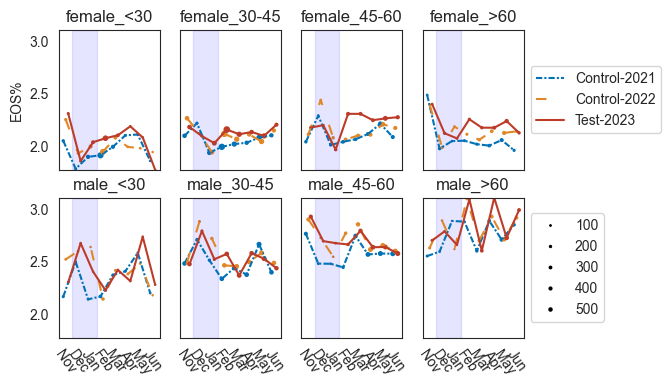

In [5]:
for tag in l_tags:
    plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


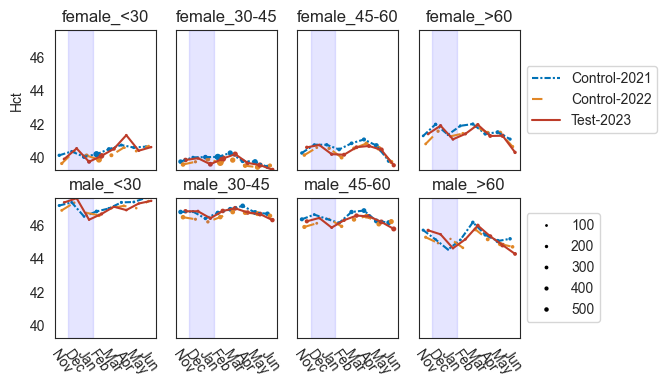

In [6]:
tag = "v9059"
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


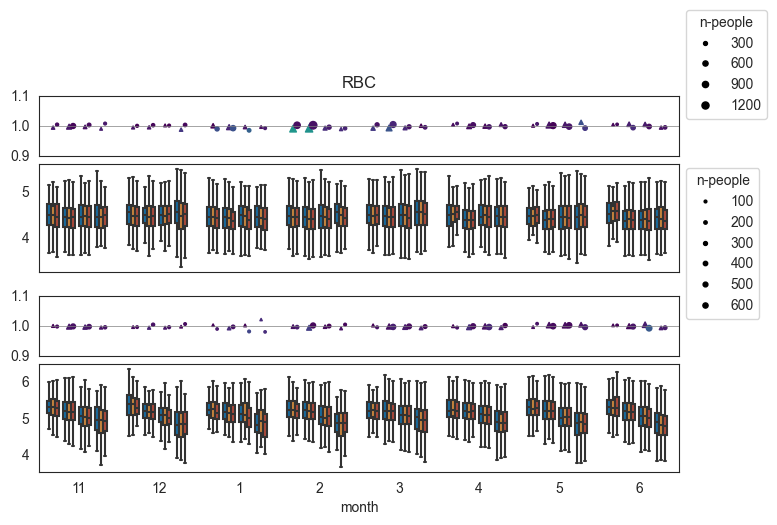

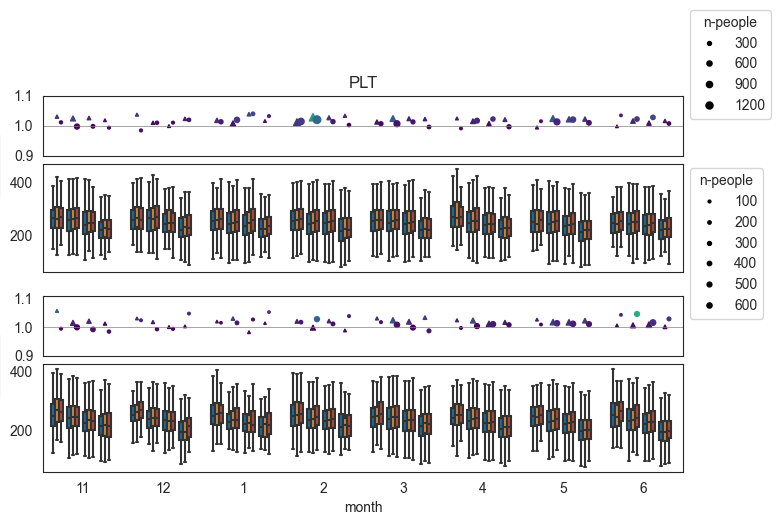

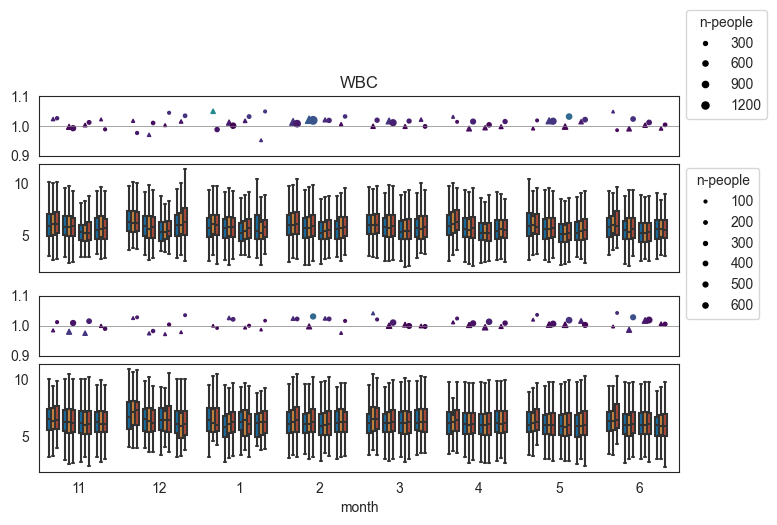

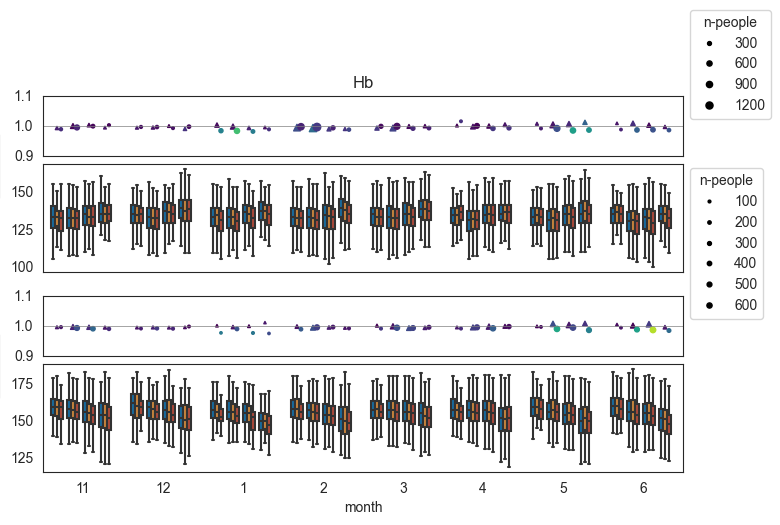

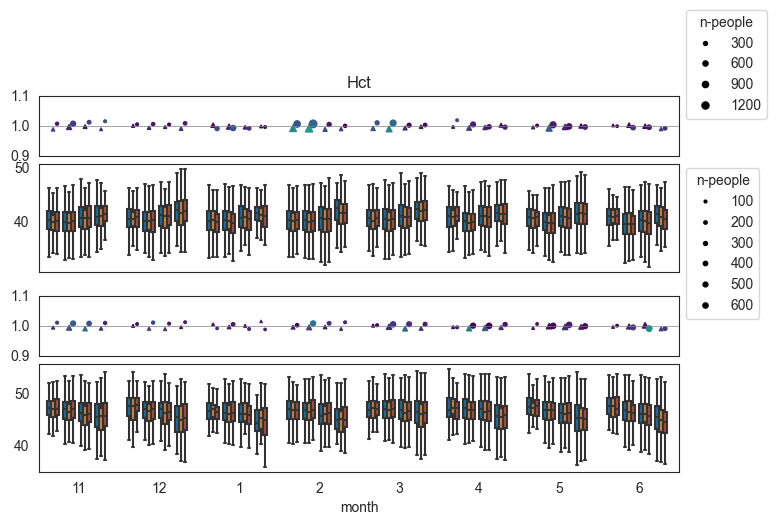

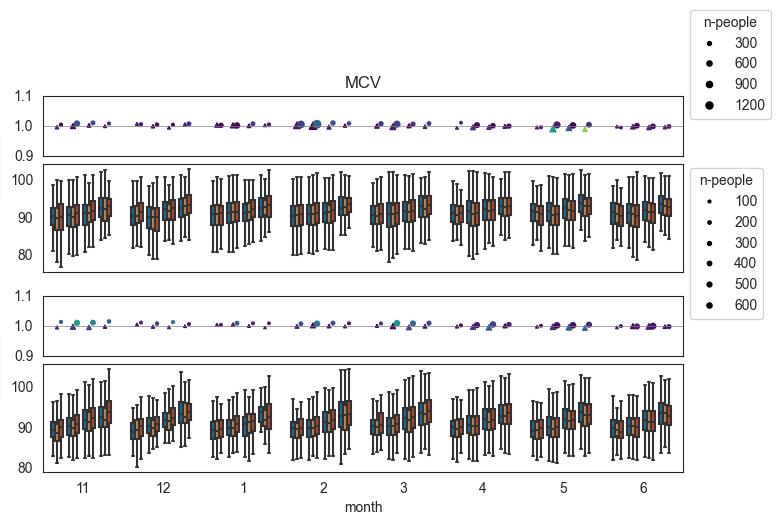

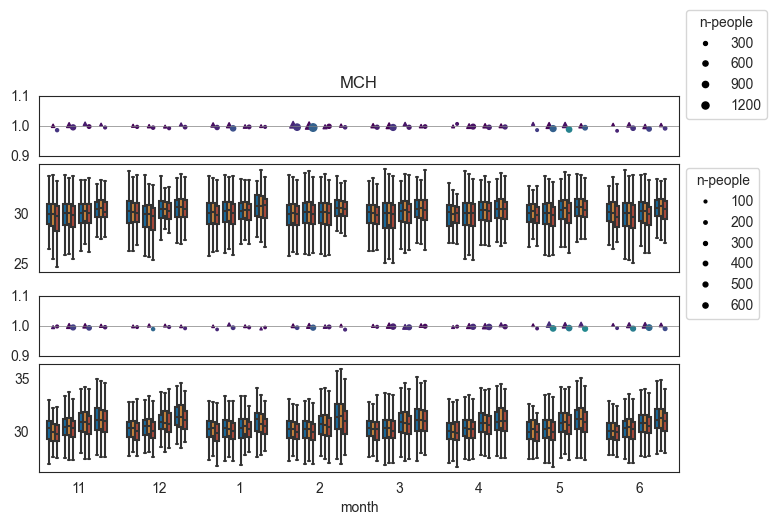

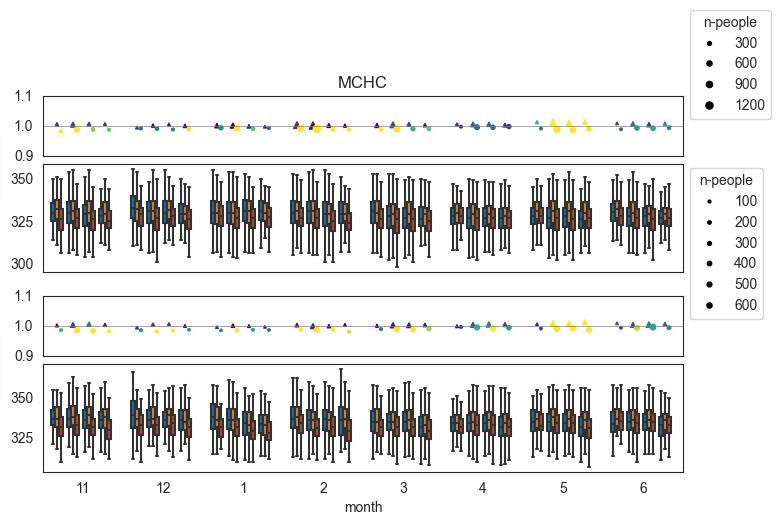

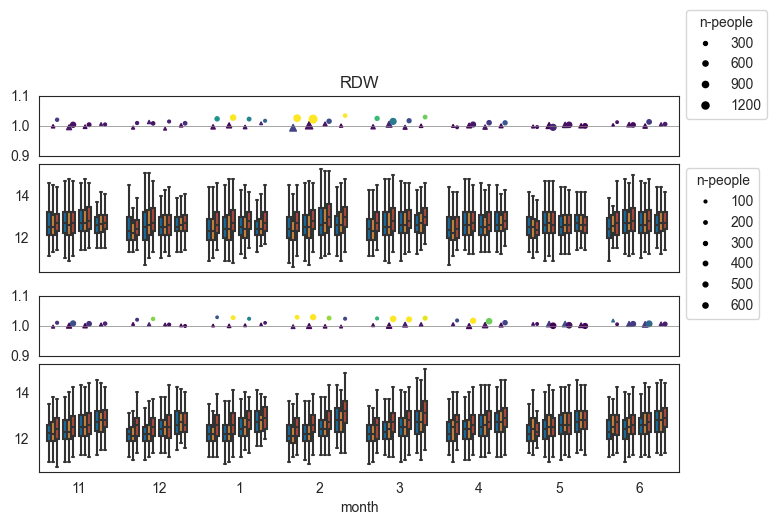

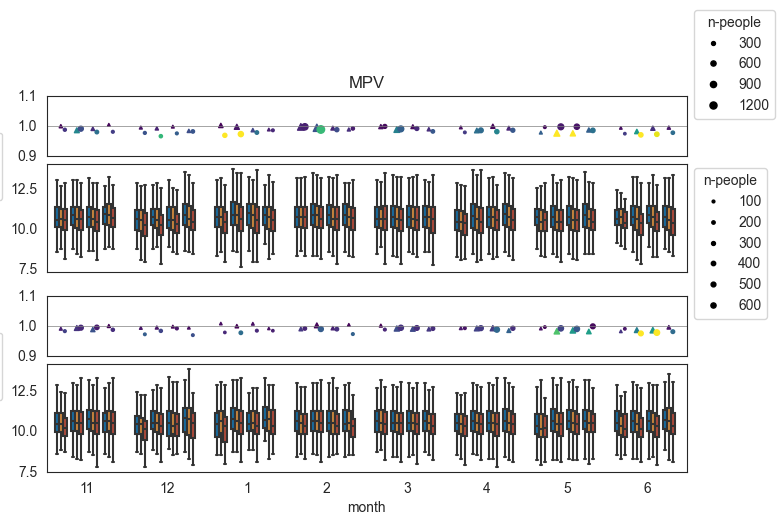

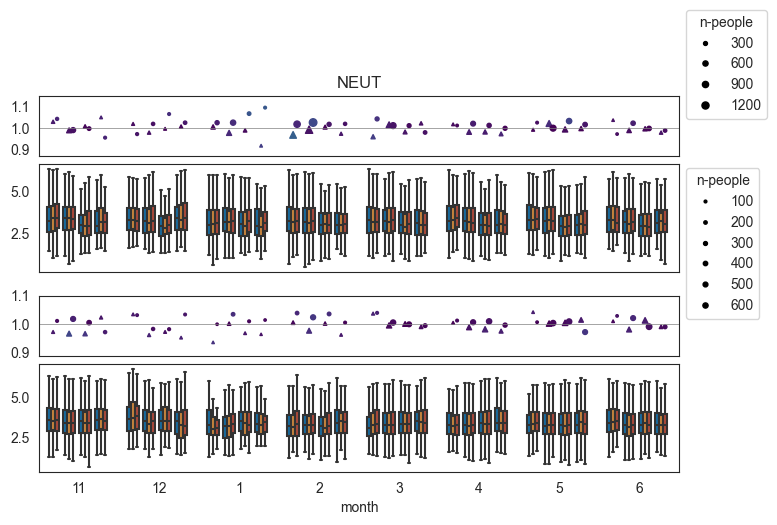

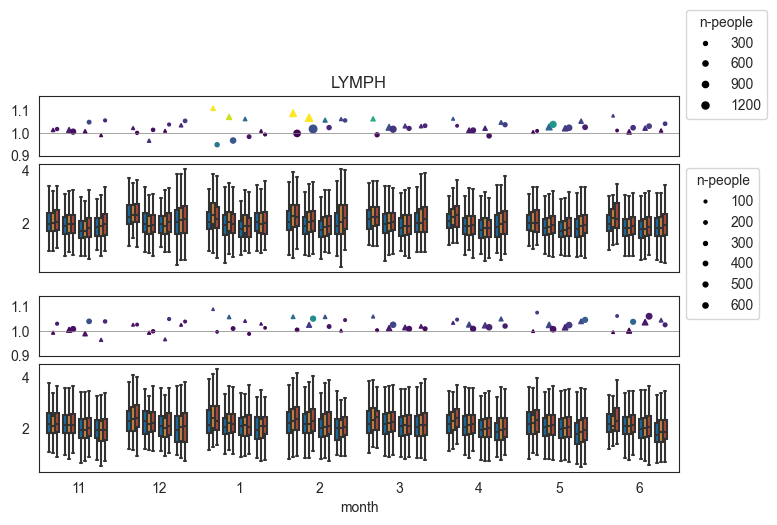

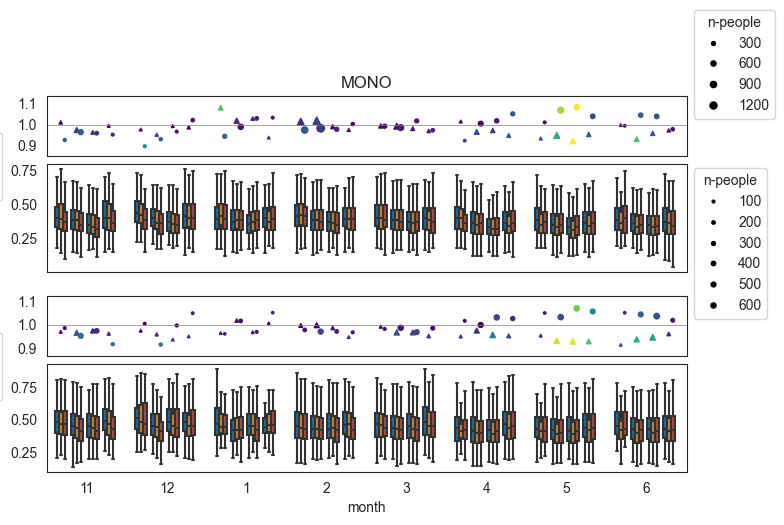

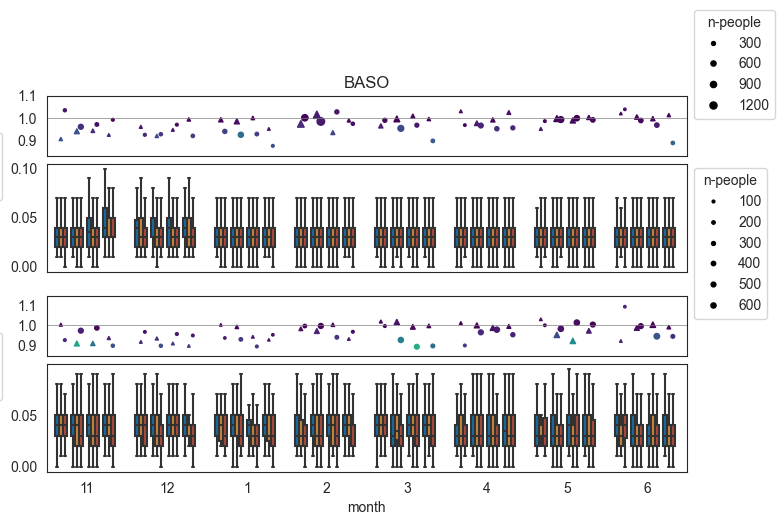

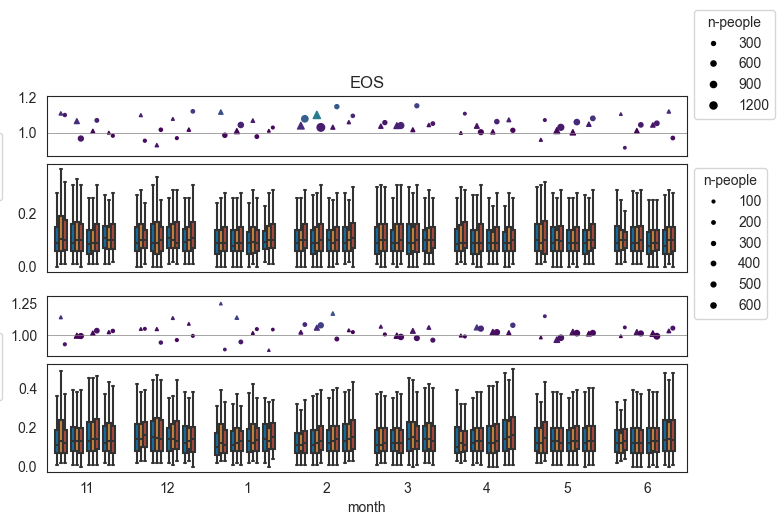

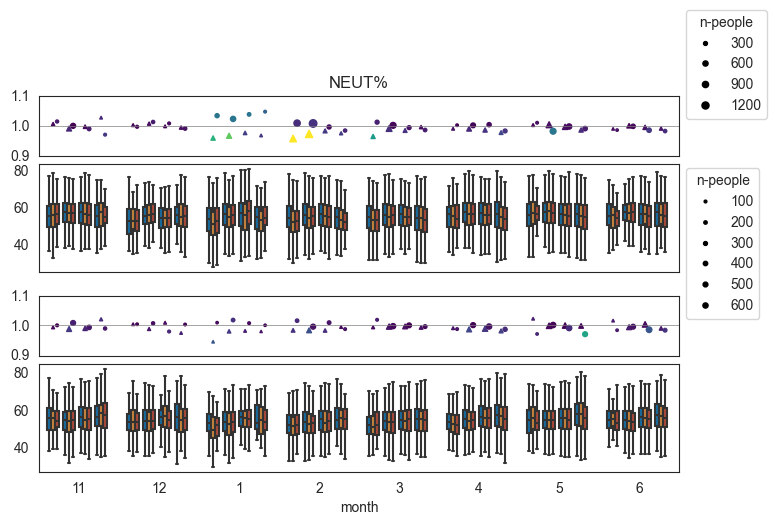

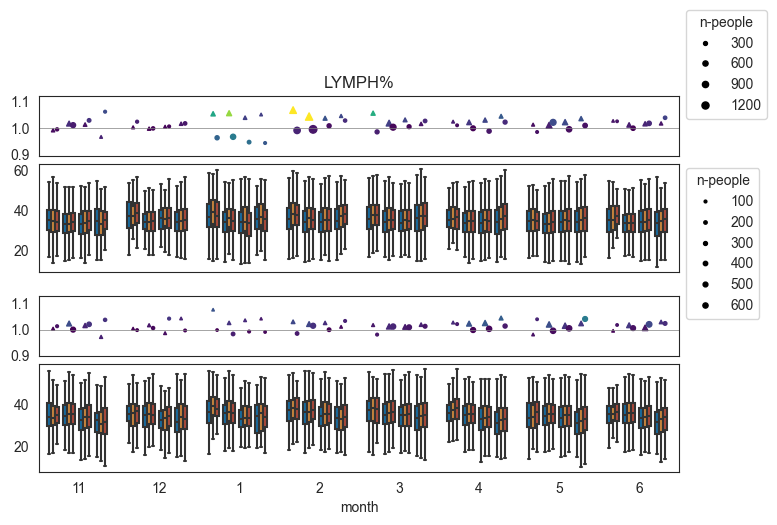

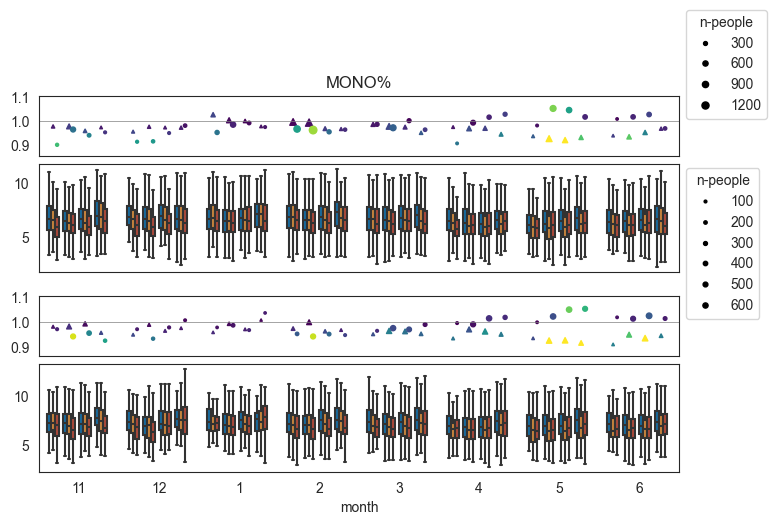

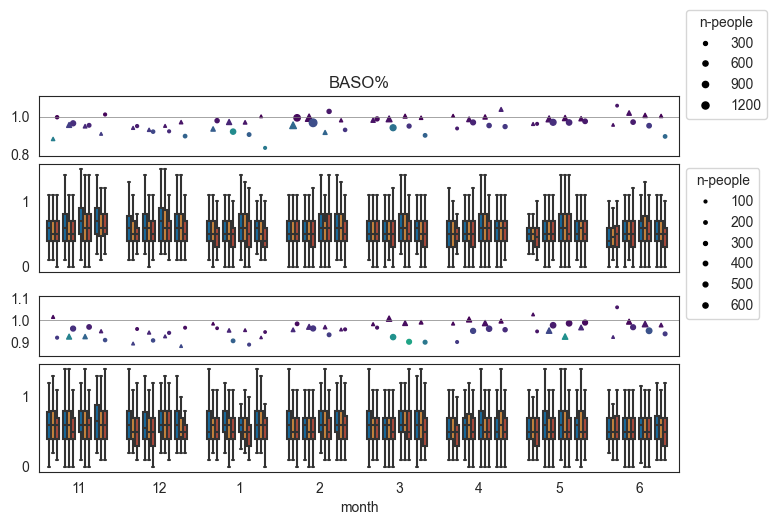

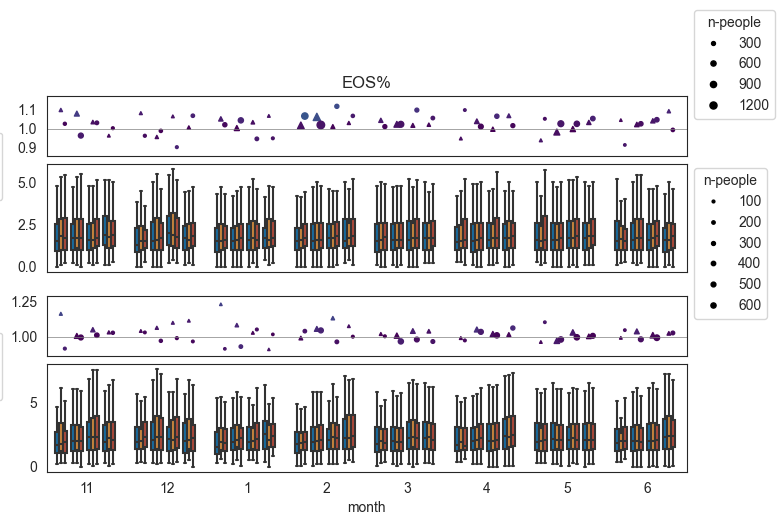

In [7]:
for tag in l_tags:
    fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )